In [18]:
import numpy as np
import matplotlib.pyplot as plt

import sys 
sys.path.append('../')

import camb
from scipy.interpolate import interp1d

In [19]:
from pyACC.Clustering import get_power_spectrum
from pyACC.Clustering import count_pairs
from pyACC.Clustering import generate_gaussian_map, poisson_sample_map

In [20]:
Omega_b = 0.05
Omega_c = 0.25

h = 0.7
As = 2.1e-9
ns = 0.96

pars = camb.CAMBparams()
pars.set_cosmology(H0=100*h, ombh2=Omega_b*h**2, omch2=Omega_c*h**2)
pars.InitPower.set_params(As=As, ns=ns)

pars.set_matter_power(redshifts=[10.], kmax=100.0)

results = camb.get_results(pars)

# Get the power spectrum at z=10
k, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=100, npoints = 512)

In [21]:
# Define the power spectrum interpolator
pk_func = interp1d(k, pk[0], fill_value='extrapolate', kind='cubic')

In [22]:
# Define the box
side = 500 # Mpc/h
spacing = 5.0 # Mpc/h

In [23]:
delta_k, delta_x = generate_gaussian_map(pk_func, side, spacing)

(array([5.20251446e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.08100578e-04, 1.56075434e-04, 4.68226302e-04,
        4.68226302e-04, 6.24301735e-04, 8.32402314e-04, 2.02898064e-03,
        2.54923209e-03, 3.64176012e-03, 4.52618758e-03, 7.69972140e-03,
        1.04050289e-02, 1.53474177e-02, 1.95614544e-02, 2.78334524e-02,
        3.73540538e-02, 4.60942781e-02, 6.32105507e-02, 7.85059432e-02,
        1.02801686e-01, 1.34537024e-01, 1.66012236e-01, 2.03106165e-01,
        2.51229423e-01, 3.08717208e-01, 3.80199757e-01, 4.50069526e-01,
        5.31905079e-01, 6.27371219e-01, 7.19923951e-01, 8.41194563e-01,
        9.41134866e-01, 1.07967783e+00, 1.20401792e+00, 1.32757764e+00,
        1.45732835e+00, 1.57792264e+00, 1.69175365e+00, 1.79382699e+00,
        1.88081303e+00, 1.96707072e+00, 2.01363322e+00, 2.06388951e+00,
        2.09115069e+00, 2.08839336e+00, 2.07335809e+00, 2.00588148e+00,
        1.94199460e+00, 1.88195758e+00, 1.78753194e+00, 1.670059

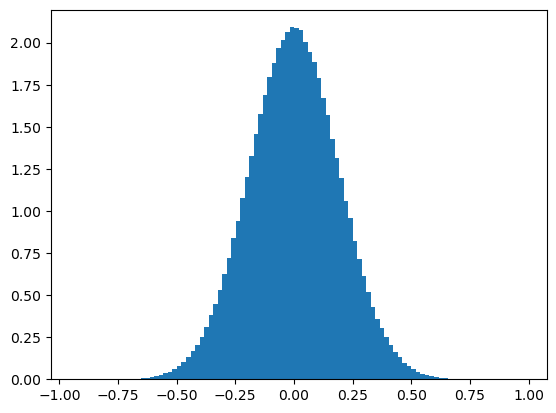

In [24]:
plt.hist(delta_x.flatten(), bins=100, density=True)

In [25]:
# Volgio ora avere il catalogo
Nobjects = 300000
catalog = poisson_sample_map(delta_x, side, spacing, Nobjects)

In [26]:
catalog.shape # vicino ai punti che volevo

(300250, 3)

In [27]:
catalog.shape[0]/(side**3) # densità media che influenza shot noise power spectrum

0.002402

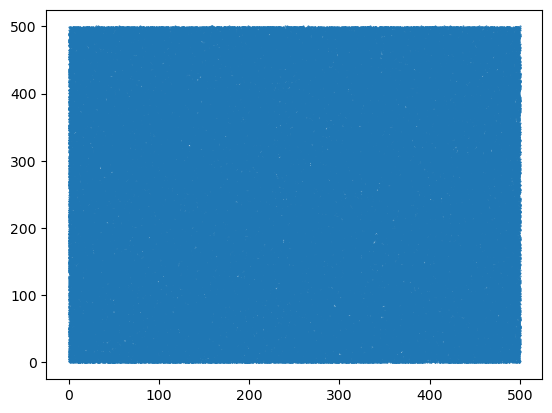

In [28]:
plt.plot(catalog[:,0], catalog[:,1], '.', ms=1)

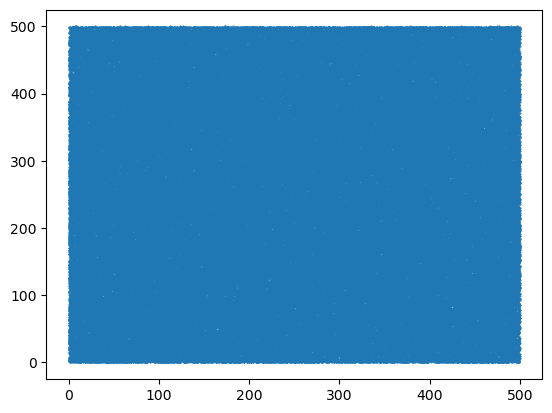

In [29]:
plt.plot(catalog[:,0], catalog[:,2], '.', ms=1)

In [30]:
# Count pairs

r_edges = np.linspace(0, 50, 11)
r_bins = (r_edges[1:] + r_edges[:-1])/2
print(r_edges)

[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50.]


In [31]:
DD = count_pairs(catalog, r_edges)

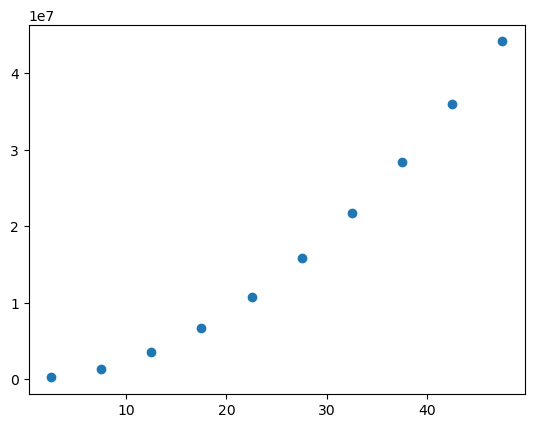

In [32]:
plt.plot(r_bins, DD, 'o')

In [33]:
random_sample = np.random.uniform(0, side, (Nobjects, 3)) # catalogo random nella mia box, ne voglio Nobjects

In [34]:
RR = count_pairs(random_sample, r_edges)

In [35]:
# Cross pairs 
DR = count_pairs(catalog, r_edges, random_sample)   


In [36]:
# Normalize pair counts
norm_DD = DD/(len(catalog)*(len(catalog)-1)/2)
norm_RR = RR/(len(random_sample)*(len(random_sample)-1)/2)
norm_DR = DR/(len(catalog)*len(random_sample))

In [37]:
xi_LS = (norm_DD - 2*norm_DR + norm_RR)/norm_RR

Text(0, 0.5, '$\\xi(r)$')

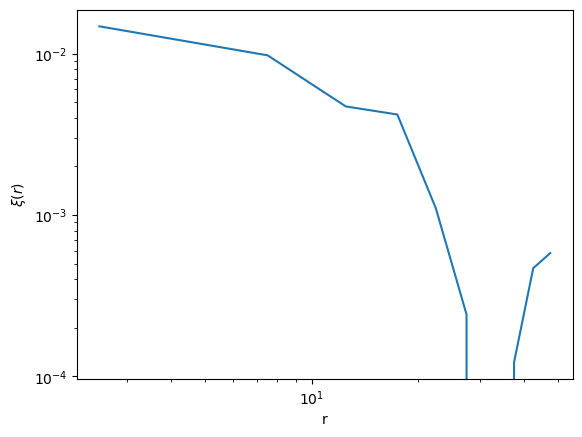

In [38]:
plt.loglog(r_bins, xi_LS, '-')
plt.xlabel('r')
plt.ylabel(r'$\xi(r)$') # è la funzione di correlazione del catalogo generato